# Preprocessing Data

## Repairing Missing Data

In [1]:
data <- matrix(c(1, 2, NaN,
                 NaN, 2, NaN,
                 3, NaN, NaN,
                 NaN, 3, 8,
                 5, 3, NaN), nrow=5, byrow=TRUE)
colnames(data) <- c("A", "B", "C")

print(data)

# counts NaN values for each feature
colSums(is.na(data))

       A   B   C
[1,]   1   2 NaN
[2,] NaN   2 NaN
[3,]   3 NaN NaN
[4,] NaN   3   8
[5,]   5   3 NaN


A B C 
2 1 4

In [2]:
library(zoo)

# Drops feature C from the dataset
data <- subset(data, select = -c(C) )

# Create a placeholder for B's missing values
missing_B <- as.integer(is.nan(data[,c("B")]))
data <- cbind(data, missing_B)
colnames(data) <- c("A", "B", "missing_B")

# Fills missings in B using B's average
fill <- mean(na.omit(data[,c("B")]))
data[is.nan(data[,c("B")]),c("B")] <- fill

# Interpolate A
data[,c("A")] <- na.approx(data[,c("A")])

print(data)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




     A   B missing_B
[1,] 1 2.0         0
[2,] 2 2.0         0
[3,] 3 2.5         1
[4,] 4 3.0         0
[5,] 5 3.0         0


# Creating Your Own Features

## Explaining the basics of SVD

In [3]:
A <- matrix(c(1, 2, 3, 4, 5, 6, 7, 8, 9), nrow=3, byrow=TRUE)
print(A)

# Perform the decomposition.
s <- svd(A)
print('U:')
print(s$u)
print('s:')
print(s$d)
print("VT:")
print(s$v)

# Create the m x n Sigma matrix.
Sigma <- diag(s$d)
print("Sigma Matrix:")
print(Sigma)

# Reconstruct the original matrix.
# Note that you must transpose s$v to obtain the correct output.
B <- s$u %*% (Sigma %*% t(s$v))
print("Reconstructed Matrix:")
print(B)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[1] "U:"
           [,1]       [,2]       [,3]
[1,] -0.2148372  0.8872307  0.4082483
[2,] -0.5205874  0.2496440 -0.8164966
[3,] -0.8263375 -0.3879428  0.4082483
[1] "s:"
[1] 1.684810e+01 1.068370e+00 1.472808e-16
[1] "VT:"
           [,1]        [,2]       [,3]
[1,] -0.4796712 -0.77669099  0.4082483
[2,] -0.5723678 -0.07568647 -0.8164966
[3,] -0.6650644  0.62531805  0.4082483
[1] "Sigma Matrix:"
        [,1]    [,2]         [,3]
[1,] 16.8481 0.00000 0.000000e+00
[2,]  0.0000 1.06837 0.000000e+00
[3,]  0.0000 0.00000 1.472808e-16
[1] "Reconstructed Matrix:"
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9


## Reorganizing data

In [4]:
library(MASS)
pca <- prcomp(Boston)
summary(pca)

Importance of components:
                            PC1     PC2      PC3      PC4     PC5     PC6
Standard deviation     175.8124 79.0621 28.67863 16.34920 8.77742 6.83253
Proportion of Variance   0.8046  0.1627  0.02141  0.00696 0.00201 0.00122
Cumulative Proportion    0.8046  0.9673  0.98869  0.99564 0.99765 0.99886
                           PC7     PC8     PC9    PC10    PC11    PC12   PC13
Standard deviation     4.13073 3.68218 2.98490 1.64961 1.04977 0.46683 0.2431
Proportion of Variance 0.00044 0.00035 0.00023 0.00007 0.00003 0.00001 0.0000
Cumulative Proportion  0.99931 0.99966 0.99989 0.99996 0.99999 1.00000 1.0000
                          PC14
Standard deviation     0.05409
Proportion of Variance 0.00000
Cumulative Proportion  1.00000

## Reorganizing data

## Using a univariate strategy

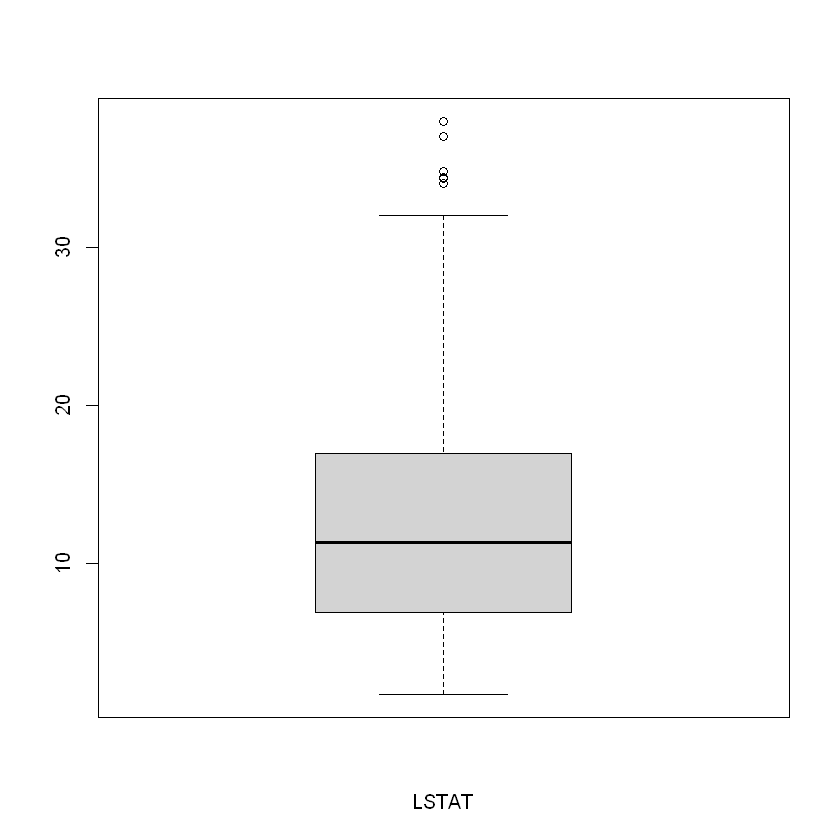

In [5]:
boxplot(Boston$lstat, xlab="LSTAT")

## Resorting to Multivariate Models

In [6]:
pca <- prcomp(scale(Boston))

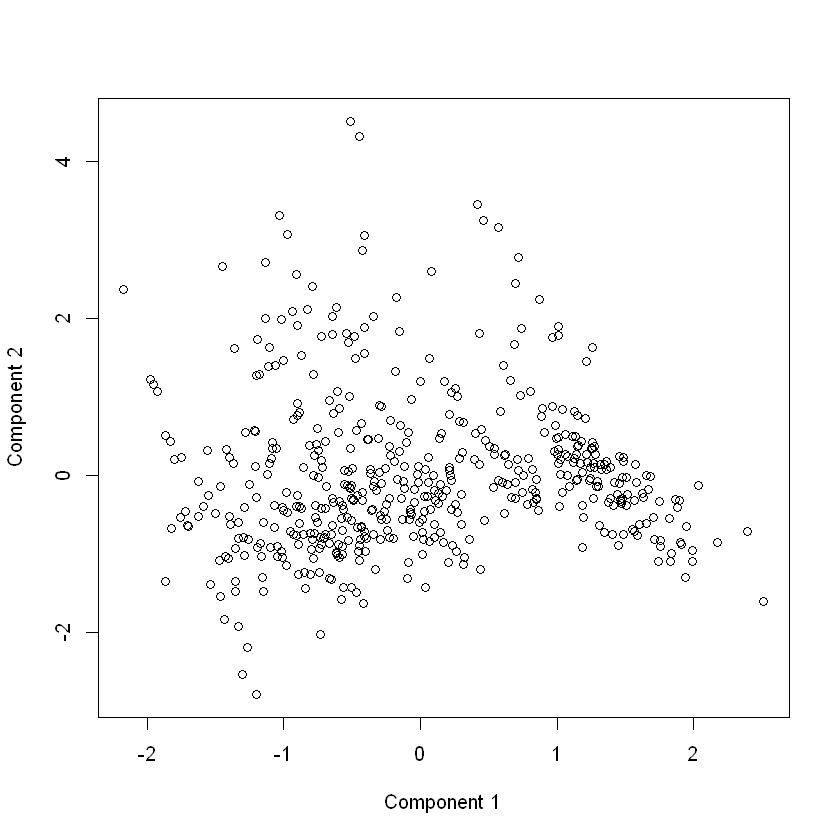

In [7]:
C <- scale(pca$x)
plot(C[,1], C[,2], xlab="Component 1", ylab="Component 2")

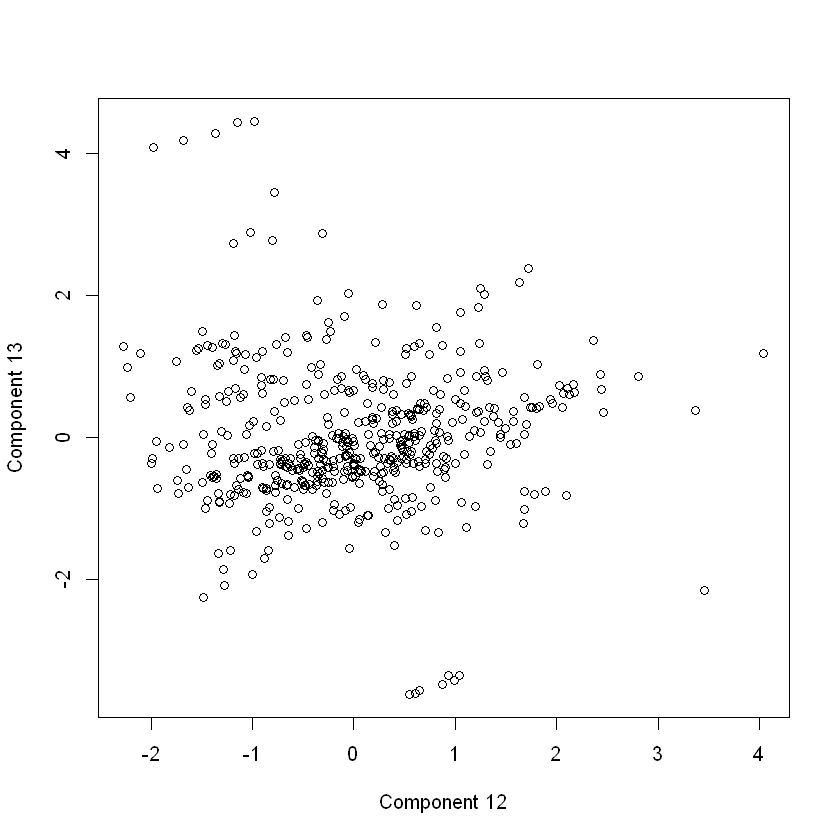

In [8]:
plot(C[,13], C[,14], xlab="Component 12", ylab="Component 13")